# Domácí úkol č. 2

Náhled tabulky (dataframe) se státy EU:

In [2]:
import pandas
from scipy import stats

eu_states = pandas.read_csv(fr"_data\countries.csv")
eu_states.shape

(27, 3)

In [3]:
eu_states.head()

,Country Name,Country,Euro
0,Belgium,BE,1
1,Greece,EL,1
2,Lithuania,LT,1
3,Portugal,PT,1
4,Bulgaria,BG,0


## Inflace

Náhled tabulky s procentem respondentů v rámci 41 evropských států považujících v létě 2022 a zimě 2022/23 inflaci a růst životních nákladů mezi dva své nejzávažnější problémy (úprava názvu a pořadí sloupců s ohledem na srozumitelnost):

In [4]:
inflation = pandas.read_csv(fr"_data\ukol_02_a.csv")
inflation.shape

(41, 3)

In [5]:
inflation = inflation.rename(columns={"97":"Summer","98":"Winter"})
inflation = inflation[["Country","Summer","Winter"]]
inflation.head()

,Country,Summer,Winter
0,BE,34,31
1,BG,31,22
2,CZ,42,34
3,DK,33,28
4,D-W,40,33


### 1. Test normality

 Pro data z obou období volíme v případě testu normality totožné hypotézy:
- **H0**: Data mají normální rozložení
- **H1**: Data nemají normální rozložení

In [6]:
res_summer = stats.shapiro(inflation["Summer"])
res_summer

ShapiroResult(statistic=0.9694532752037048, pvalue=0.33090925216674805)

In [7]:
res_winter = stats.shapiro(inflation["Winter"])
res_winter

ShapiroResult(statistic=0.9803106784820557, pvalue=0.6872954964637756)

Na hladině významnosti 5 % nelze nulovou hypotézu u žádné z datových sad zamítnout (p-hodnota > 0,05). Výsledek Shapiro-Wilk testu pooukazuje na vyšší pravděpodobnost normálního rozložení u obou z nich. Rozdíl výsledků však zároveň naznačuje, že rozložení dat nebude totožné.

### 2. Statistický test

To, že se procento lidí řadících inflaci mezi své nezávažnější aktuální problémy mezi létem a zimou změnilo, je patrné okometricky ze samotných dat i grafu:

<AxesSubplot:ylabel='Density'>

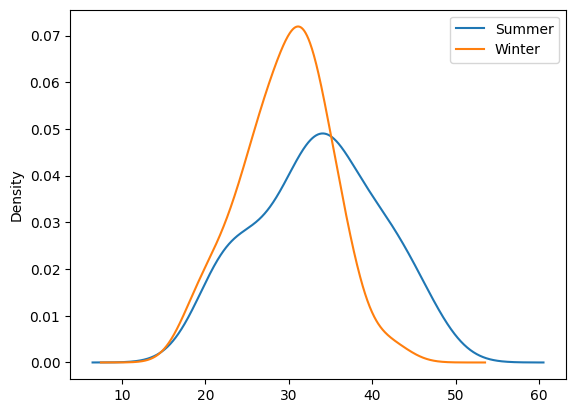

In [8]:
inflation["Summer"].plot.kde(legend="x")
inflation["Winter"].plot.kde(legend="x")
# legendu jde u funkce hustoty vynutit zvláštním způsobem, schválně jsem ponechala s pseudo-hodnotou (bez hodnoty se nezobrazí)

Formulujeme dvě hypotézy:
- **H0**: Distribuce dat z léta 2022 a zimy 2022/23 se neliší
- **H1**: Distribuce dat z léta 2022 a zimy 2022/23 se liší

Pro pořádek můžeme provést párový t-test na průměr a neparametrický (přestože data poukazují na normální rozdělení) Wilcoxonův test distribuční funkce:

In [9]:
res1 = stats.ttest_rel(inflation["Summer"], inflation["Winter"])
res1

Ttest_relResult(statistic=3.868878598419143, pvalue=0.0003938172257904746)

In [10]:
res2 = stats.wilcoxon(inflation["Summer"], inflation["Winter"])
res2

WilcoxonResult(statistic=164.0, pvalue=0.0015867563030735003)

Výsledky obou testů potvrzují předpoklad, tedy zamítnutí nulové hypotézy - p-hodnota obou testů je menší než stanovená hladina významnosti 5 %. V platnosti zůstává alternativní hypotéza podporující různé rozložení dat z léta a zimy roku 2022/2023. 

## Důvěra ve stát a EU

Náhled tabulky s daty o důvěře v instituce v rámci 41 evropských států:

In [11]:
trust = pandas.read_csv(fr"_data\ukol_02_b.csv")
trust.shape

(41, 3)

In [12]:
trust.head()

,Country,National Government Trust,EU Trust
0,BE,40,55
1,BG,19,49
2,CZ,30,43
3,DK,52,65
4,D-W,54,53


Redukce tabulky pouze na státy EU:

In [13]:
trust_eu = pandas.merge(eu_states, trust)
trust_eu.shape

(27, 5)

In [14]:
trust_eu.head()

,Country Name,Country,Euro,National Government Trust,EU Trust
0,Belgium,BE,1,40,55
1,Greece,EL,1,22,37
2,Lithuania,LT,1,36,69
3,Portugal,PT,1,45,68
4,Bulgaria,BG,0,19,49


### 1. Test normality

In [15]:
res_gov = stats.shapiro(trust_eu["National Government Trust"])
res_gov

ShapiroResult(statistic=0.9438270926475525, pvalue=0.1514083594083786)

In [16]:
res_eu = stats.shapiro(trust_eu["EU Trust"])
res_eu

ShapiroResult(statistic=0.973580539226532, pvalue=0.6981598734855652)

Výsledky testů normality nás nenechají zamítnout H0 o normálním rozdělení ani u jedné z datových sad (p-hodnota obou testů je větší než stanovená hodnota významnosti 5 %).

### 2. Statistický test

S ohledem na předpokádanou normalitu dat využijeme parametrický test statistické závislosti využívající Pearsonův korelační koeficient.
- **H0**: Mezi procentem lidí důvěřujících EU a těmi, kdo věří vládě svého státu, neexistuje lineární závislost.
- **H1**: Mezi procentem lidí důvěřujících EU a těmi, kdo věří vládě svého státu, existuje lineární závislost.

In [17]:
res3 = stats.pearsonr(trust_eu["National Government Trust"], trust_eu["EU Trust"])
res3

(0.6097186340024556, 0.0007345896228823399)

Výsledná hodnota korelačního koeficientu nad 0,5 i p-hodnota menší než stanovená hodnota významnosti 5 % vedou k zamítnutí nulové hypotézy. Výsledek testu naznačuje možnou korelaci mezi mírou důvěry v EU a důvěry v národní vládu.

## Důvěra v EU a euro

Rozdělení EU států do dvou tabulek podle účasti v eurozóně:

In [29]:
states_euro = trust_eu[trust_eu["Euro"] == 1]
states_euro.shape

(18, 5)

In [30]:
states_non_euro = trust_eu[trust_eu["Euro"] == 0]
states_non_euro.shape

(9, 5)

### Statistický test

- **H0**: Důvěra v EU se ve státech eurozóny a mimo ni neliší.
- **H0**: Důvěra v EU se ve státech eurozóny a mimo ni liší.

Budeme vycházet z předpokladu normálního rozdělení dat. Využijeme nepárový parametrický t-test na porovnání průměrů a neparametrický Mann-Whitney test pro srovnání rozložení.

In [20]:
res4 = stats.ttest_ind(states_euro["EU Trust"], states_non_euro["EU Trust"])
res4

Ttest_indResult(statistic=-0.33471431258258433, pvalue=0.7406326832748829)

In [21]:
res5 = stats.mannwhitneyu(states_euro["EU Trust"], states_non_euro["EU Trust"])
res5

MannwhitneyuResult(statistic=75.5, pvalue=0.3984014889129569)

Testy nevyvrací nulovou hypotézu - v obou případech je p-hodnota vyšší než stanovená hladina významnosti 5 %. Neprokázali jsme tak, že by se míra důvěry v EU ve státech eurozóny a mimo ni lišila.

Pro vizuální porovnání distribuce obou datových souborů použijeme graf funkce hustoty:

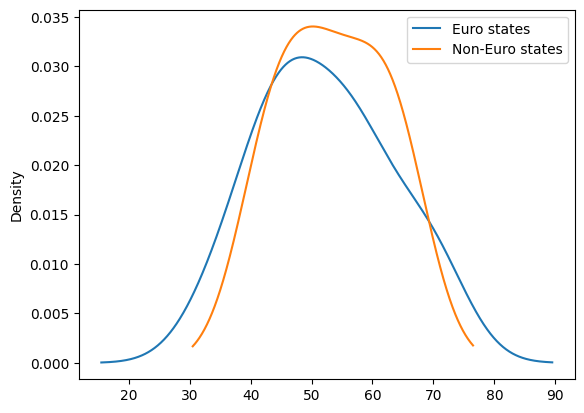

In [26]:
import matplotlib.pyplot as plt

states_euro["EU Trust"].plot.kde(label="Euro states")
states_non_euro["EU Trust"].plot.kde(label="Non-Euro states")
plt.legend()